In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [53]:
# Load the train dataset for mean calculation
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [57]:
# compute mean and std of the train dataset
mean = train_dataset.data.float().mean() / 255
std = train_dataset.data.float().std() / 255

mean, std

(tensor(0.1307), tensor(0.3081))

In [55]:
# define transformation to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(mean,), std=(std,))
])

# Load the train and test datasets with normalization. these normalizations are applied to the images when they are loaded
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [64]:
# Compute the mean and standard deviation of the normalized dataset as a sanity check
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
data = next(iter(train_loader))

# data[0] is the tensor containing all the images
# data[1] is the tensor containing all the labels
mean = data[0].mean()
std = data[0].std()

mean, std

(tensor(-5.6966e-08), tensor(1.0000))

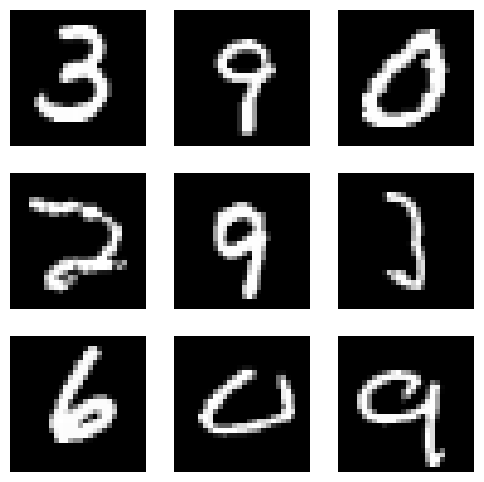

In [96]:
# Create a DataLoader to load the data in batches
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=9, shuffle=True)

# Get a batch of images from the DataLoader
images, labels = next(iter(test_loader))

# Create a grid of images and display them
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
axs = axs.flatten()

for i, image in enumerate(images):
    # Convert the tensor image to a numpy array and transpose it
    image = np.transpose(image.numpy(), (1, 2, 0))

    # Display the image on the corresponding subplot
    axs[i].imshow(image[:, :, 0], cmap='gray')
    axs[i].axis('off')

# Show the plot
plt.show()

In [97]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

In [99]:
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network and other training parameters
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
num_epochs = 5

# Train the neural network
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

# Evaluate the neural network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


[1,   100] loss: 1.089
[1,   200] loss: 0.423
[1,   300] loss: 0.333
[1,   400] loss: 0.255
[1,   500] loss: 0.251
[1,   600] loss: 0.220
[1,   700] loss: 0.217
[1,   800] loss: 0.204
[1,   900] loss: 0.163
[2,   100] loss: 0.138
[2,   200] loss: 0.151
[2,   300] loss: 0.135
[2,   400] loss: 0.125
[2,   500] loss: 0.129
[2,   600] loss: 0.126
[2,   700] loss: 0.124
[2,   800] loss: 0.125
[2,   900] loss: 0.100
[3,   100] loss: 0.086
[3,   200] loss: 0.099
[3,   300] loss: 0.086
[3,   400] loss: 0.083
[3,   500] loss: 0.083
[3,   600] loss: 0.086
[3,   700] loss: 0.086
[3,   800] loss: 0.090
[3,   900] loss: 0.070
[4,   100] loss: 0.061
[4,   200] loss: 0.067
[4,   300] loss: 0.063
[4,   400] loss: 0.057
[4,   500] loss: 0.059
[4,   600] loss: 0.063
[4,   700] loss: 0.064
[4,   800] loss: 0.065
[4,   900] loss: 0.052
[5,   100] loss: 0.044
[5,   200] loss: 0.049
[5,   300] loss: 0.045
[5,   400] loss: 0.045
[5,   500] loss: 0.046
[5,   600] loss: 0.047
[5,   700] loss: 0.046
[5,   800] 

In [8]:
lre = torch.linspace(-3, -1, 1000)
lrs = 10 ** lre


tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010,
        0.0010, 0.0010, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 